## 淘宝用户行为数据推荐

✅ 项目目标：分析淘宝平台用户的行为数据，理解用户的购买路径与行为特征，并基于用户的行为数据构建一个简单的推荐策略或评分逻辑。

🔗 数据来源：https://tianchi.aliyun.com/dataset/649

📔数据描述：本数据集包含了2017年11月25日至2017年12月3日之间，有行为的约一百万随机用户的所有行为（行为包括点击、购买、加购、喜欢）。数据集的组织形式和MovieLens-20M类似，即数据集的每一行表示一条用户行为，由用户ID、商品ID、商品类目ID、行为类型和时间戳组成，并以逗号分隔。关于数据集中每一列的详细描述如下


**数据集描述：**
1. 用户ID（user_id）：整数类型
2. 商品ID（item_id）：整数类型
3. 商品类目ID（item_category）：整数类型
4. 行为类型（behavior_type）：字符串，枚举类型，包括（`pv`, `buy`,`cart`,`fav`）
5. 时间戳（timestamp）：行为发生的时间戳

**行为类型**：
1. `pv`：商品详情页pv，等价于点击
2. `buy`：商品购买
3. `cart`：将商品加入购物车
4. `fav`：收藏商品

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
taobao = pd.read_csv("data/UserBehavior.csv", names=['user_id','item_id','item_category','behavior_type','timestamp'])
taobao.head(5)

,user_id,item_id,item_category,behavior_type,timestamp
0,1,2268318,2520377,pv,1511544070
1,1,2333346,2520771,pv,1511561733
2,1,2576651,149192,pv,1511572885
3,1,3830808,4181361,pv,1511593493
4,1,4365585,2520377,pv,1511596146


In [3]:
taobao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100150807 entries, 0 to 100150806
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   user_id        int64 
 1   item_id        int64 
 2   item_category  int64 
 3   behavior_type  object
 4   timestamp      int64 
dtypes: int64(4), object(1)
memory usage: 3.7+ GB


In [4]:
taobao.describe()

,user_id,item_id,item_category,timestamp
count,1.001508e+08,1.001508e+08,1.001508e+08,1.001508e+08
mean,5.069431e+05,2.579775e+06,2.696380e+06,1.511951e+09
std,2.940605e+05,1.488056e+06,1.463155e+06,5.528006e+06
min,1.000000e+00,1.000000e+00,8.000000e+01,-2.134949e+09
25%,2.524290e+05,1.295225e+06,1.320293e+06,1.511762e+09
50%,5.040150e+05,2.580735e+06,2.671397e+06,1.511965e+09
75%,7.609490e+05,3.862042e+06,4.145813e+06,1.512179e+09
max,1.018011e+06,5.163070e+06,5.162429e+06,2.122867e+09


排查timestamp数据

In [5]:
print(taobao[taobao['timestamp']<0].shape)

(318, 5)


In [6]:
taobao.shape

(100150807, 5)

In [7]:
taobao.isnull().sum()

user_id          0
item_id          0
item_category    0
behavior_type    0
timestamp        0
dtype: int64

## 数据理解和预处理

In [8]:
# 将时间戳转换为日期可读格式
# unit = 's'
taobao['time'] = pd.to_datetime(taobao['timestamp'], unit='s', utc=True).dt.tz_convert('Asia/Shanghai').dt.tz_localize(None)
taobao.head(5)

,user_id,item_id,item_category,behavior_type,timestamp,time
0,1,2268318,2520377,pv,1511544070,2017-11-25 01:21:10
1,1,2333346,2520771,pv,1511561733,2017-11-25 06:15:33
2,1,2576651,149192,pv,1511572885,2017-11-25 09:21:25
3,1,3830808,4181361,pv,1511593493,2017-11-25 15:04:53
4,1,4365585,2520377,pv,1511596146,2017-11-25 15:49:06


In [9]:
# 日期范围
min_date = taobao['time'].min()
max_date = taobao['time'].max()
print(f"日期范围: {min_date} - {max_date}")

日期范围: 1902-05-08 06:32:46 - 2037-04-09 13:22:35


Text(0, 0.5, 'Count')

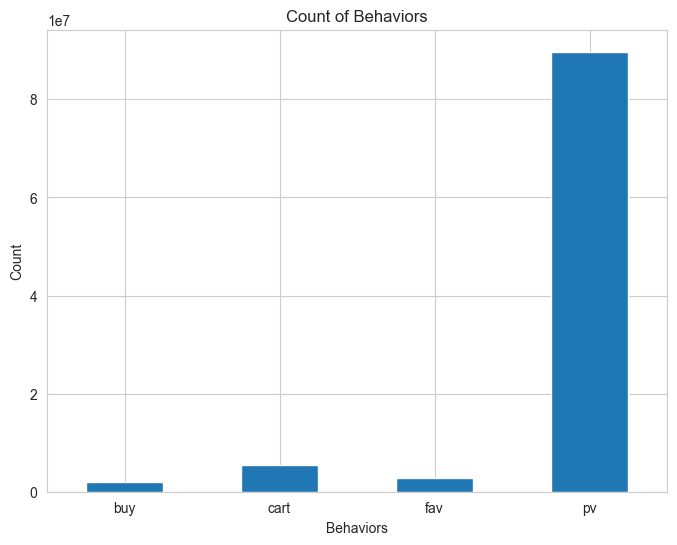

In [10]:
# 探索各类行为的数量分布
fig, ax = plt.subplots()
behaviors = taobao.groupby('behavior_type')['behavior_type'].count()
behaviors.plot.bar(rot=0, figsize=(8,6), ax=ax)
ax.set_title('Count of Behaviors')
ax.set_xlabel('Behaviors')
ax.set_ylabel('Count')

In [13]:
behaviors = behaviors.reset_index(name='count')
behaviors['frac'] = behaviors['count']/behaviors['count'].sum()
behaviors

,behavior_type,count,frac
0,buy,2015839,0.020128
1,cart,5530446,0.055221
2,fav,2888258,0.028839
3,pv,89716264,0.895812


In [14]:
taobao['date'] = taobao['time'].dt.date
taobao['weekday'] = taobao['time'].dt.weekday
taobao['hour'] = taobao['time'].dt.hour

In [15]:
import datetime
start_day = datetime.date(2017,11,25)
end_day = datetime.date(2017,12,3)
print(taobao[(taobao['date']>=start_day)&(taobao['date']<=end_day)].shape[0])

100095231


In [16]:
# 筛选出所有在日期范围内的数据
new_taobao = taobao[(taobao['date']>=start_day)&(taobao['date']<=end_day)]

In [17]:
new_taobao.shape[0]

100095231

In [18]:
new_taobao[new_taobao['behavior_type']=='buy'].shape[0]

2015839

### 随机抽取百分之十的用户

In [19]:
users = new_taobao['user_id'].unique()

In [20]:
users_id = np.random.choice(users, size=int(len(users)*0.01),replace=False)

In [21]:
users_sample = new_taobao[new_taobao['user_id'].isin(users_id)]
users_sample.shape

(1001721, 9)

In [22]:
users_sample.to_csv('data/users_sample.csv', index=False)

In [23]:
behaviors = users_sample['behavior_type'].value_counts().reset_index(name='count')
behaviors['count'] = behaviors['count']/behaviors['count'].sum()
behaviors

,behavior_type,count
0,pv,0.896560
1,cart,0.054148
2,fav,0.029530
3,buy,0.019762


### 分层抽样

In [25]:
sample_df = (
    new_taobao.groupby('behavior_type',group_keys=False).apply(lambda x: x.sample(frac=0.05, random_state=42)).reset_index(drop=True)
)
sample_df.shape

KeyboardInterrupt: 

In [22]:
sample_df.head()

,user_id,item_id,item_category,behavior_type,timestamp,time,date,weekday,hour
0,197902,731612,4558987,buy,1511927995,2017-11-29 03:59:55,2017-11-29,2,3
1,513488,1967624,2885642,buy,1511608164,2017-11-25 11:09:24,2017-11-25,5,11
2,84905,1813380,863375,buy,1512184543,2017-12-02 03:15:43,2017-12-02,5,3
3,126321,1575073,4392650,buy,1512095072,2017-12-01 02:24:32,2017-12-01,4,2
4,314746,1228517,1647415,buy,1512044672,2017-11-30 12:24:32,2017-11-30,3,12


In [23]:
counts = sample_df['behavior_type'].value_counts().reset_index(name='count')
counts['frac'] = counts['count']/counts['count'].sum()
counts

,behavior_type,count,frac
0,pv,3894387,0.895738
1,cart,239454,0.055076
2,fav,125667,0.028904
3,buy,88175,0.020281


In [24]:
sample_df.to_csv('data/sample_df.csv', index=False)